# Классификация в задаче прогнозирования загрязнения воздуха тяжелыми металлами

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Подгрузка данных


In [ ]:
uri = open(".mongodb_token").read()

client = pymongo.MongoClient(uri)
db = client['heavymetals']
collection = db['heavymetals']

In [ ]:
df = pd.DataFrame(list(db.Fe_cor_indexes.find()))
df = df.dropna()

## Классификация
Для задачи классификации необходимо разбить концентрацию диапазоны. Для железа (Fe), интервалы выглядят следующим образом

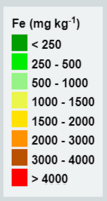

In [ ]:
Al = [200, 400, 800, 1200, 2500, 4000, 8000]
Fe = [250, 500, 1000, 1500, 2000, 3000, 4000]
V =  [0.5, 1, 2, 4, 6, 8, 10]
Ni = [1, 2, 3, 6, 9, 12, 15]
Cr = [1, 2, 3, 4, 6, 10, 15]
Pb = [1, 2, 4, 8, 12, 16, 20]
As = [0.1, 0.2, 0.4, 0.6, 0.9, 1.2, 1.6]

def classDef(x,metClassRange):
  for i in range(len(metClassRange)):
    if (x < metClassRange[i]):
      return i
    elif (x >= metClassRange[len(metClassRange)-1]):
      return len(metClassRange)


In [ ]:
df['Fe']=df['Fe'].dropna().map(lambda x: classDef(x,Fe))

Выравнивание признаков (исходя из анализа данных, при построении модели регрессии)

In [ ]:

df['Night_view_time'] = np.log(df[('Night_view_time')]+1)
df['Day_view_time'] = np.log(df[('Day_view_time')]+1)
df['sur_refl_b07'] = np.log(df[('sur_refl_b07')]+1)
df['BRDF_Albedo_Parameters_Band6_geo'] = np.log(df[('BRDF_Albedo_Parameters_Band6_geo')]+1)
df['BRDF_Albedo_Parameters_Band7_iso'] = np.log(df[('BRDF_Albedo_Parameters_Band7_iso')]+1)

In [ ]:
df = df.drop(columns=['num_observations_500m','num_observations_1km','LC_Type4','SolarAzimuth'])

In [ ]:
df

,LC_Type4,SWIRVZA,VNIRVZA,SAA,SZA,TIME,LST_Day_1km,Night_view_time,Day_view_time,B5,...,SZEN,VZEN,B11,B6,sur_refl_b07,BRDF_Albedo_Parameters_Band6_geo,BRDF_Albedo_Parameters_Band6_iso,BRDF_Albedo_Parameters_Band7_geo,BRDF_Albedo_Parameters_Band7_iso,Fe
0,6.0,73.0,73.0,108.0,77.5,699.0,14864.5,221.0,110.0,14950.419341,...,4656.777778,3699.500000,22827.816975,13805.278284,1396.500000,54.5,294.500000,44.0,184.5,1
1,6.0,73.0,73.0,108.0,77.5,700.0,15009.0,221.0,110.0,16227.613449,...,4638.583333,3693.500000,23251.804882,14170.123809,1687.500000,41.5,334.000000,31.0,208.5,2
2,6.0,72.0,72.0,109.0,78.0,701.0,14832.0,221.0,110.0,16225.441665,...,4691.875000,3656.500000,22635.824845,14423.536211,1354.500000,57.0,293.166667,39.0,170.5,0
3,2.0,73.0,73.0,109.0,79.0,701.0,14846.0,221.0,110.0,15969.163140,...,4656.250000,3648.541667,22468.118812,12886.915464,1032.000000,44.0,262.000000,33.0,142.0,1
4,4.0,72.0,72.0,109.0,79.0,702.0,14944.5,221.0,111.0,15577.268577,...,4595.142857,3599.250000,22547.717038,14246.689616,1336.102642,69.0,317.500000,46.0,184.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,1.0,55.0,55.0,115.0,119.0,573.0,13639.5,210.0,120.0,13201.465095,...,6093.250000,3725.666667,17121.741984,8567.513688,495.000000,12.5,130.500000,6.0,57.0,7
4584,1.0,55.0,55.0,116.0,119.0,574.0,13661.5,209.0,121.0,15632.825340,...,6104.000000,3539.285714,17349.935914,9699.876964,691.000000,26.0,211.500000,11.0,93.0,7
4585,1.0,52.5,53.0,116.0,118.5,577.0,13615.0,209.0,121.0,14191.578955,...,6220.250000,3822.166667,17169.377438,9159.969833,427.500000,14.5,123.000000,8.0,51.0,7
4586,1.0,52.0,52.0,117.0,120.0,579.0,13609.5,210.0,121.0,13294.281481,...,6158.250000,3236.000000,17305.457150,8760.299543,430.000000,17.0,139.500000,8.0,60.0,7


### Распределение классов

In [ ]:
set(df['Fe'])

{0, 1, 2, 3, 4, 5, 6, 7}

In [ ]:
from collections import Counter

In [ ]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [ ]:
unique, counts = np.unique(y, return_counts=True)
data = dict(zip(unique, counts))

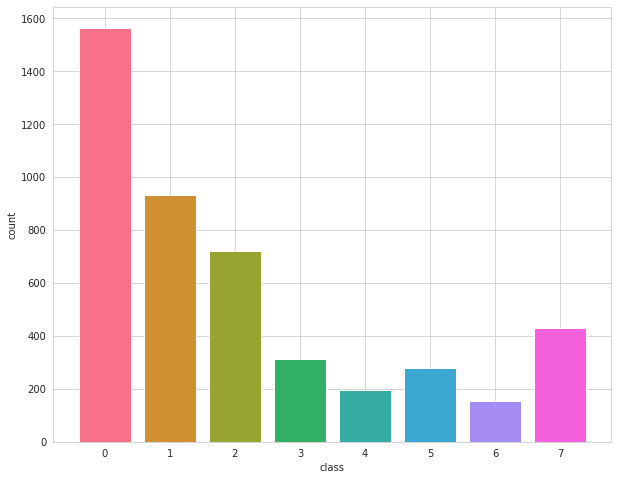

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ind = np.arange(len(data))
palette = sns.color_palette("husl", len(data))

plt.bar(ind, list(data.values()), color=palette)
plt.xticks(ind, list(data.keys()))
ax.set(xlabel='class', ylabel='count')
plt.show()

### Разделение на выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

### Балансировка выборки SMOTE
ВАЖНО проводить балансировку только для обучающей выборки

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=SEED)
X_res, y_res = sm.fit_resample(df.iloc[:,:-1], df.iloc[:,-1:])

In [ ]:
sm = SMOTE(random_state=SEED)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
dist = dict(Counter(y_res))

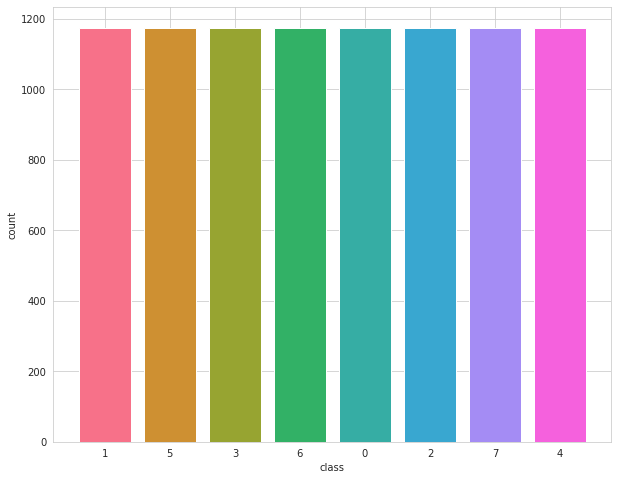

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ind = np.arange(len(dist))
palette = sns.color_palette("husl", len(dist))

plt.bar(ind, list(dist.values()), color=palette)
plt.xticks(ind, list(dist.keys()))
ax.set(xlabel='class', ylabel='count')
plt.show()

### Вычисление метрик

In [ ]:
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.pyplot import figure


def metricsCalc(model):
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(classification_report(y_test, predictions))
  figure(figsize=(10, 8), dpi=80)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
  plt.show()

In [ ]:
def metricsCalc(model,X_test,y_test):
  y_pred = model.predict(X_test)
  predictions = [round(value) for value in y_pred]
  accuracy = accuracy_score(y_test, predictions)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(classification_report(y_test, predictions))
  figure(figsize=(10, 8), dpi=80)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
  plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# лучшая подоранная модель
gb_clf2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.075, max_features=3, max_depth=12, random_state=0)

In [ ]:
gb_clf2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingClassifier(learning_rate=0.075, max_depth=12, max_features=3,
                           n_estimators=300, random_state=0)

Accuracy: 81.09%
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       404
           1       0.62      0.66      0.64       389
           2       0.69      0.70      0.70       409
           3       0.85      0.90      0.87       348
           4       0.91      0.93      0.92       380
           5       0.95      0.87      0.91       413
           6       0.94      0.96      0.95       387
           7       0.83      0.83      0.83       400

    accuracy                           0.81      3130
   macro avg       0.81      0.81      0.81      3130
weighted avg       0.81      0.81      0.81      3130



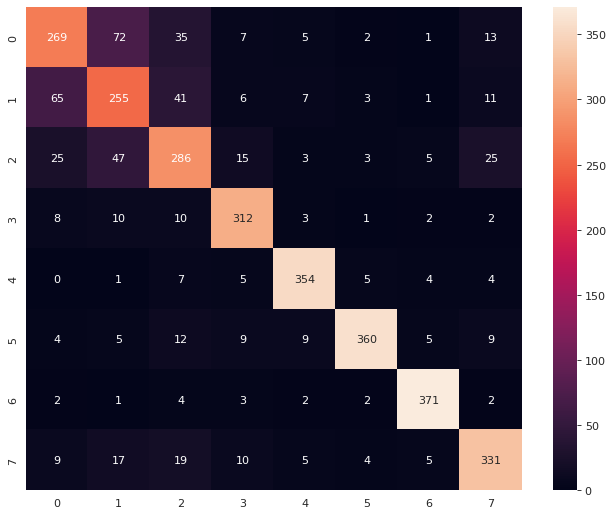

In [ ]:
metricsCalc(gb_clf2)

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters = {"learning_rate": [0.01,0.05,0.075],
              "max_depth"    : range(5,15),
              "n_estimators" : [100,200,300,400],
              "max_features" : range(2,10)
              }

model = GradientBoostingClassifier()
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10)
randm.fit(X_train, y_train)

In [ ]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               cv = 5, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

In [ ]:
gb_clf2

GradientBoostingClassifier(learning_rate=0.075, max_depth=12, max_features=3,
                           n_estimators=300, random_state=0)

### NN classifier

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
import keras.backend as K

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# y_test = to_categorical(y_test)

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [ ]:
y_test

,0,1,2,3,4,5,6,7
0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2345,0,0,0,0,0,1,0,0
2346,1,0,0,0,0,0,0,0
2347,0,0,0,1,0,0,0,0
2348,0,0,0,0,1,0,0,0


In [ ]:
X_train.shape[1]

28

In [ ]:
# create model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

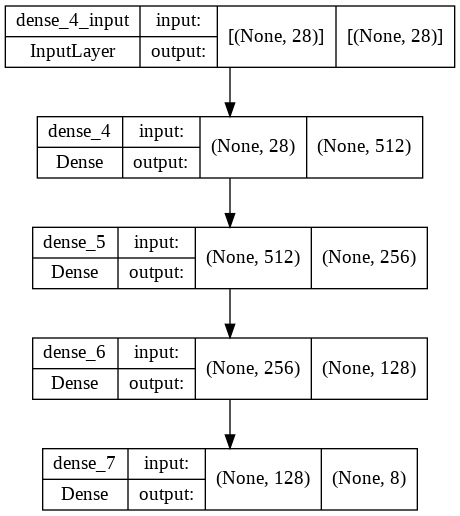

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
epochs = 200
batch_size = 64

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=8, verbose=1, factor=0.25, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=9, verbose=1, mode='min')

history = model.fit(X_train, y_train, verbose=2, epochs=epochs, batch_size=batch_size , validation_data = (X_test,y_test),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    callbacks=[early_stopping, learning_rate_reduction])

Epoch 1/200
110/110 - 2s - loss: 1.9263 - accuracy: 0.2388 - val_loss: 1.8510 - val_accuracy: 0.2932 - lr: 0.0010 - 2s/epoch - 14ms/step
Epoch 2/200
110/110 - 1s - loss: 1.8085 - accuracy: 0.3053 - val_loss: 1.7607 - val_accuracy: 0.3285 - lr: 0.0010 - 773ms/epoch - 7ms/step
Epoch 3/200
110/110 - 1s - loss: 1.7336 - accuracy: 0.3498 - val_loss: 1.7108 - val_accuracy: 0.3711 - lr: 0.0010 - 946ms/epoch - 9ms/step
Epoch 4/200
110/110 - 1s - loss: 1.6326 - accuracy: 0.3922 - val_loss: 1.6439 - val_accuracy: 0.3911 - lr: 0.0010 - 1s/epoch - 11ms/step
Epoch 5/200
110/110 - 1s - loss: 1.5490 - accuracy: 0.4313 - val_loss: 1.5357 - val_accuracy: 0.4481 - lr: 0.0010 - 1s/epoch - 10ms/step
Epoch 6/200
110/110 - 1s - loss: 1.4499 - accuracy: 0.4699 - val_loss: 1.4705 - val_accuracy: 0.4651 - lr: 0.0010 - 1s/epoch - 11ms/step
Epoch 7/200
110/110 - 1s - loss: 1.3506 - accuracy: 0.5109 - val_loss: 1.3845 - val_accuracy: 0.5034 - lr: 0.0010 - 1s/epoch - 11ms/step
Epoch 8/200
110/110 - 1s - loss: 1.24

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
prob = model.predict(X_test)
predictions = [np.unique(np.argmax(y_test, axis=1))[k.argmax(axis=-1)] for k in prob]

In [ ]:
y_test = to_categorical(y_test)

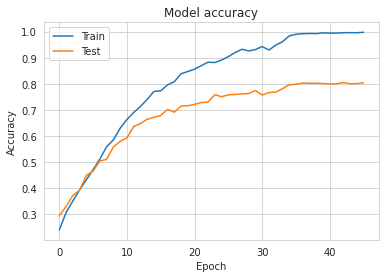

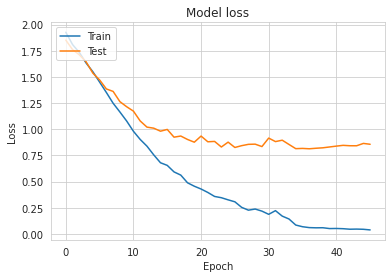

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Выводы
Лучшей моделью градиентного бустинга для прогнозирования тяжелых металлов в задаче классификации проявил себя XGBoostClassifier, точность (accuracy) для 8 классов при прогнозировании железа (Fe) составила 81%. Точность нейросетевой модели MLP архитектуры составила 80%, при этом, получаемые ошибки находятся в соседних классовых диапазонах.

Таких показателей будет достаточно, чтобы производить мониторинг, как при помощи нейронных сетей, так и с помощью градиентного бустинга для деревьев решений. Полученную нейросетевую модель можно использовать в более сложных архитектурах, например в сиамских сетях, в качестве модели извлечения признаков.

Необходимо протестировать state of the art (SOTA) решения в области metric learning, для задач прогнозирования, а также апробировать архитектуры глубокого обучения для работы с табличными данными.